### ДАвИД

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
le = LabelEncoder()



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [6]:
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


### Описание данных

# Признаки:
- sex - Пол
- age - Возраст
- height - Рост
- weight - Вес
- waistline - Обхват талии
- sight_left - Острота зрения левого глаза
- sight_right - Острота зрения правого глаза
- hear_left - Слух на левом ухе
- hear_right - Слух на правом ухе
- SBP - Систолическое артериальное давление
- DBP - Диастолическое артериальное давление
- BLDS - Уровень сахара в крови
- tot_chole - Общий холестерин в крови
- HDL_chole - Холестерин липопротеинов высокой плотности
- LDL_chole - Холестерин липопротеинов низкой плотности
- triglyceride - Триглицерид
- hemoglobin - Гемоглобин
- urine_protein - Белок в моче
- serum_creatinine - Уровень креатинина в сыворотке крови
- SGOT_AST - Уровень фермента аспартатаминотрансферазы
- SGOT_ALT - Уровень фермента аланинаминотрансферазы
- gamma_GTP - Уровень гамма-глутамилтранспептидазы
- SMK_stat_type_cd - Статус курения
- DRK_YN - Статус употребления алкоголя

In [9]:
df.shape

(991346, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [11]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке sex = 0
Кол-во пропусков в колонке age = 0
Кол-во пропусков в колонке height = 0
Кол-во пропусков в колонке weight = 0
Кол-во пропусков в колонке waistline = 0
Кол-во пропусков в колонке sight_left = 0
Кол-во пропусков в колонке sight_right = 0
Кол-во пропусков в колонке hear_left = 0
Кол-во пропусков в колонке hear_right = 0
Кол-во пропусков в колонке SBP = 0
Кол-во пропусков в колонке DBP = 0
Кол-во пропусков в колонке BLDS = 0
Кол-во пропусков в колонке tot_chole = 0
Кол-во пропусков в колонке HDL_chole = 0
Кол-во пропусков в колонке LDL_chole = 0
Кол-во пропусков в колонке triglyceride = 0
Кол-во пропусков в колонке hemoglobin = 0
Кол-во пропусков в колонке urine_protein = 0
Кол-во пропусков в колонке serum_creatinine = 0
Кол-во пропусков в колонке SGOT_AST = 0
Кол-во пропусков в колонке SGOT_ALT = 0
Кол-во пропусков в колонке gamma_GTP = 0
Кол-во пропусков в колонке SMK_stat_type_cd = 0
Кол-во пропусков в колонке DRK_YN = 0


In [12]:
df.duplicated().sum()

26

In [13]:
df[df.duplicated()]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
159911,Female,40,170,85,88.0,0.9,0.9,1.0,1.0,120.0,...,121.0,115.0,10.4,1.0,0.9,17.0,14.0,33.0,1.0,N
175152,Male,65,170,75,101.1,0.6,0.7,1.0,1.0,130.0,...,109.0,140.0,17.1,1.0,1.0,24.0,31.0,26.0,3.0,N
246305,Female,50,155,70,90.8,1.0,1.0,1.0,1.0,150.0,...,150.0,183.0,14.9,1.0,0.8,24.0,22.0,42.0,1.0,N
280830,Male,45,170,75,86.4,1.2,0.7,1.0,1.0,150.0,...,122.0,499.0,14.9,1.0,0.8,23.0,11.0,342.0,3.0,Y
284528,Female,65,150,55,86.0,0.9,0.9,1.0,1.0,120.0,...,139.0,136.0,11.9,1.0,0.7,27.0,18.0,14.0,1.0,N
290463,Female,20,160,50,70.0,1.0,1.0,1.0,1.0,106.0,...,98.0,56.0,12.7,1.0,0.8,18.0,13.0,11.0,1.0,N
335747,Male,50,180,95,101.0,1.5,1.5,1.0,2.0,177.0,...,120.0,105.0,15.0,3.0,0.9,19.0,27.0,61.0,3.0,Y
429596,Male,75,160,60,83.0,1.2,0.7,1.0,1.0,105.0,...,150.0,82.0,16.0,2.0,1.1,27.0,22.0,26.0,1.0,N
453451,Male,35,170,65,85.0,0.9,1.2,1.0,1.0,130.0,...,80.0,126.0,14.7,1.0,0.9,14.0,13.0,10.0,2.0,Y
471596,Female,45,165,65,82.0,1.0,1.0,1.0,1.0,120.0,...,103.0,53.0,13.6,1.0,0.5,17.0,19.0,28.0,1.0,N


In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991320.0,47.614529,14.181346,20.0,35.0,45.0,60.0,85.0
height,991320.0,162.240563,9.282922,130.0,155.0,160.0,170.0,190.0
weight,991320.0,63.283884,12.514101,25.0,55.0,60.0,70.0,140.0
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991320.0,122.432360,14.543083,67.0,112.0,120.0,131.0,273.0
DBP,991320.0,76.052549,9.889334,32.0,70.0,76.0,82.0,185.0


***

### Вывод
Обнаружили 26 дубликатов и удалили их

## Визуальный Анализ

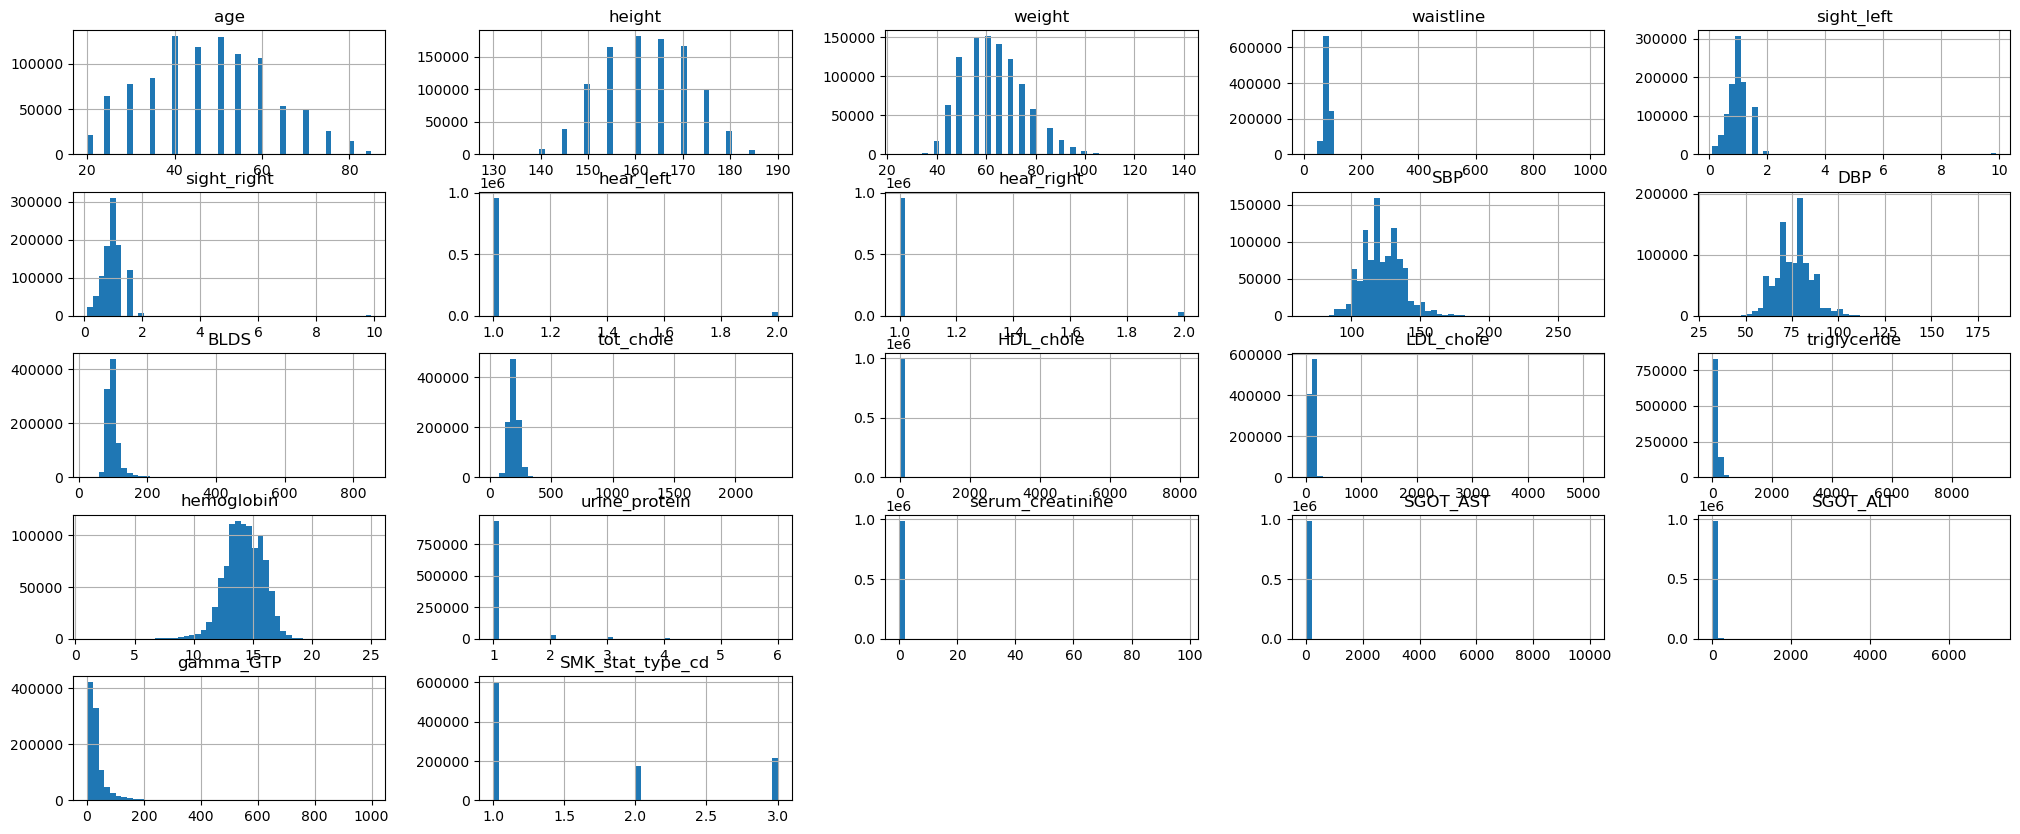

In [20]:
df.hist(figsize = (25,10), bins = 50);

<Axes: xlabel='sex'>

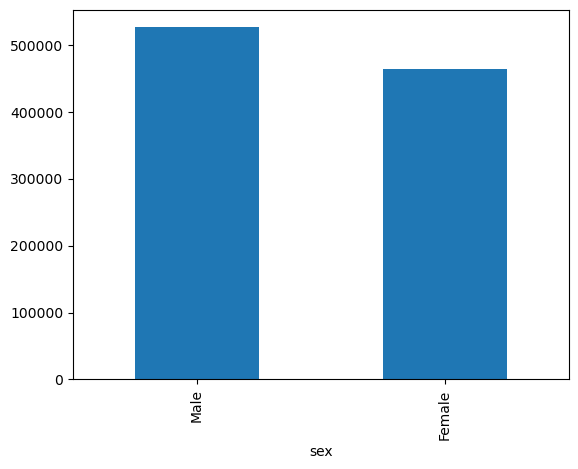

In [21]:
df['sex'].value_counts(normalize=False).plot.bar()

## Данил

In [23]:
df_limited = df.head(200000)

In [24]:
# Преобразование категориальных данных
encoder = LabelEncoder()
df_limited['sex'] = encoder.fit_transform(df_limited['sex'])
df_limited['DRK_YN'] = encoder.fit_transform(df_limited['DRK_YN'])

In [25]:
# Разделение признаков и целевой переменной
X = df_limited.drop(columns=['SMK_stat_type_cd'])  # Целевая переменная
y = df_limited['SMK_stat_type_cd']

In [26]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Логистическая регрессия

In [29]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Оценка на тестовой выборке
y_pred1 = model1.predict(X_test)
accuracy1 = model1.score(X_test, y_test)
class_report1 = classification_report(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)

In [31]:
accuracy1

0.6911166666666667

In [32]:
print(class_report1)

              precision    recall  f1-score   support

         1.0       0.82      0.83      0.83     36414
         2.0       0.45      0.32      0.37     10663
         3.0       0.49      0.60      0.54     12923

    accuracy                           0.69     60000
   macro avg       0.59      0.58      0.58     60000
weighted avg       0.69      0.69      0.69     60000



In [33]:
conf_matrix1

array([[30363,  2156,  3895],
       [ 3258,  3372,  4033],
       [ 3292,  1899,  7732]], dtype=int64)

# Ближайшие соседи

In [35]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# Оценка на тестовой выборке
y_pred2 = model2.predict(X_test)
accuracy2 = model2.score(X_test, y_test)
class_report2 = classification_report(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

In [37]:
accuracy2

0.65545

In [38]:
print(class_report2)

              precision    recall  f1-score   support

         1.0       0.77      0.86      0.81     36414
         2.0       0.36      0.35      0.36     10663
         3.0       0.48      0.35      0.40     12923

    accuracy                           0.66     60000
   macro avg       0.54      0.52      0.52     60000
weighted avg       0.63      0.66      0.64     60000



In [39]:
conf_matrix2

array([[31153,  2950,  2311],
       [ 4390,  3695,  2578],
       [ 4951,  3493,  4479]], dtype=int64)

Результат такой себе относительно других моделей. Есть проблемы в 2.0 и 3.0

# Случайные деревья

In [42]:
model3 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [43]:
# Оценка на тестовой выборке
y_pred3 = model3.predict(X_test)
accuracy3 = model3.score(X_test, y_test)
class_report3 = classification_report(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

In [44]:
accuracy3

0.6999833333333333

In [45]:
print(class_report3)

              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84     36414
         2.0       0.48      0.27      0.35     10663
         3.0       0.51      0.60      0.55     12923

    accuracy                           0.70     60000
   macro avg       0.60      0.58      0.58     60000
weighted avg       0.69      0.70      0.69     60000



In [46]:
conf_matrix3

array([[31312,  1642,  3460],
       [ 3618,  2915,  4130],
       [ 3593,  1558,  7772]], dtype=int64)

In [47]:
# Результаты

In [48]:
classifiers =["Logistic Regression", "KNeighborsClassifier", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [accuracy1, accuracy2, accuracy3]
log

,Classifier,Accuracy
0,Logistic Regression,0.691117
1,KNeighborsClassifier,0.655450
2,Random Forest Classifier,0.699983


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

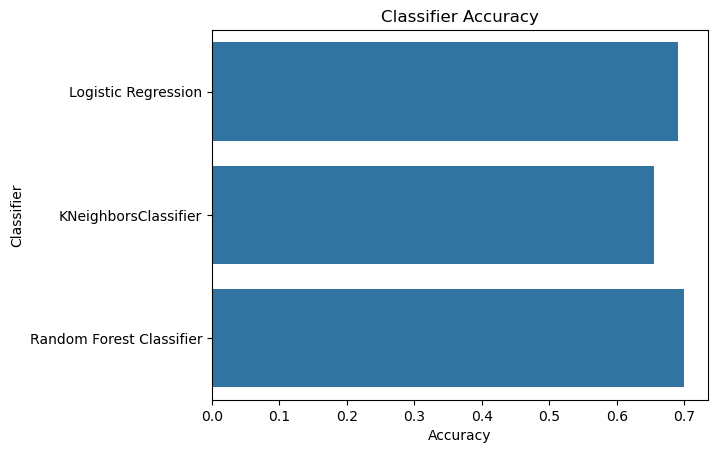

In [49]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.barplot(x='Accuracy', y='Classifier', data=log)

# Вывод


Лучшие показатели точности (Test Accuracy) были у модели Random Forest (70.31%), что делает её предпочтительной для текущего набора данных.

Классы 2.0 и 3.0 представляют сложности для всех моделей. Это связано с их меньшим представлением в данных и, возможно, пересечением признаков с классом 1.0.